## Natural Language Processing With Python

In [1]:
import nltk

In [2]:
#nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

Download which package (l=list; x=cancel)?


        Mjikeliso\AppData\Roaming\nltk_data...



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


      Unzipping corpora\stopwords.zip.



Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_eng Averaged Perceptron Tagger (JSON)
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.............. Chat-80 Data Files
  [ ] city_database....... City

        Mjikeliso\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!


In [4]:
message = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
print(len(message))

5574


In [6]:
message[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [8]:
for mess_no,message in enumerate(message[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [10]:
message[1]

'p'

In [11]:
import pandas as pd

In [16]:
message = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','messages'])

In [17]:
message.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
message.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [19]:
message.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [20]:
message['length'] = message['messages'].apply(len)

In [21]:
message.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<Axes: ylabel='Frequency'>

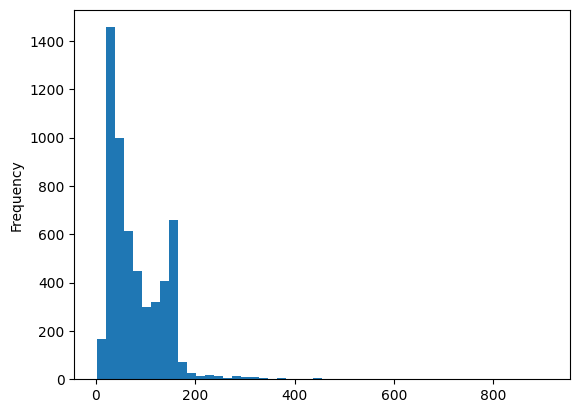

In [24]:
message['length'].plot.hist(bins=50)

In [25]:
message['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [27]:
message[message['length']==910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

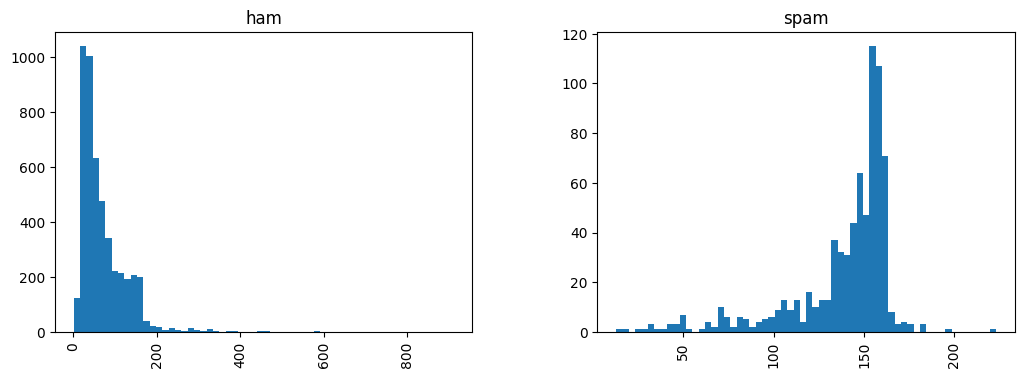

In [28]:
message.hist(column='length',by='label',bins=60,figsize=(12,4))

In [29]:
import string

In [30]:
mess = 'Sample message! Notice: it has punctuation.'

In [34]:
string.punctuation
nopunc = [c for c in mess if c not in string.punctuation]

In [32]:
from nltk.corpus import stopwords

In [35]:
nopunc = ''.join(nopunc)

In [36]:
nopunc

'Sample message Notice it has punctuation'

In [37]:
x = ['a','b','c','d']

In [38]:
'_'.join(x)

'a_b_c_d'

In [39]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [40]:
clean_mess = [ word for word in nopunc.split()if word.lower()not in stopwords.words('english')]

In [41]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [42]:
def text_process(mess):
    """  
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    
    """
    nopunc= [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split()if word.lower()not in stopwords.words('english')]

In [43]:
message.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [44]:
#Tokenizing
message['messages'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [45]:
#Vectorization
from sklearn.feature_extraction.text import CountVectorizer


In [46]:
bow_transfomer = CountVectorizer(analyzer=text_process).fit(message['messages'])

In [47]:
print(len(bow_transfomer.vocabulary_))

11425


In [48]:
mess4 = message['messages'][3]

In [49]:
mess4

'U dun say so early hor... U c already then say...'

In [50]:
bow4 = bow_transfomer.transform([mess4])

In [51]:
print(bow4)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [52]:
print(bow4.shape)

(1, 11425)


In [54]:
bow_transfomer.get_feature_names_out()[9554]

'say'

In [55]:
messages_bow = bow_transfomer.transform(message['messages'])

In [56]:
print('Shape of Sparse Matrix: ',messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [57]:
messages_bow.nnz

50548

In [59]:
sparsity =(100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [60]:
from sklearn.feature_extraction.text import TfidfTransformer

In [61]:
tfidf_transfomer = TfidfTransformer().fit(messages_bow)

In [62]:
tfidf4 = tfidf_transfomer.transform(bow4)

In [63]:
print(tfidf4)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 4068)	0.4083258993338407
  (0, 4629)	0.2661980190608719
  (0, 5261)	0.2972995740586873
  (0, 6204)	0.2995379972369742
  (0, 6222)	0.31872168929491496
  (0, 7186)	0.4389365653379858
  (0, 9554)	0.5385626262927565


In [64]:
tfidf_transfomer.idf_[bow_transfomer.vocabulary_['university']]

np.float64(8.527076498901426)

In [65]:
messages_tfidf = tfidf_transfomer.transform(messages_bow)

In [66]:
from sklearn.naive_bayes import MultinomialNB

In [67]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,message['label'])

In [68]:
spam_detect_model.predict(tfidf4[0])

array(['ham'], dtype='<U4')

In [70]:
message['label'][3]

'ham'

In [71]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [72]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'],
      shape=(5572,), dtype='<U4')

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
msg_train,msg_test,label_train,label_test = train_test_split(message['messages'],message['label'],test_size=0.3)

In [75]:
msg_train

3058    Just woke up. Yeesh its late. But I didn't fal...
5286             I'm still pretty weak today .. Bad day ?
1010    Dear Hero,i am leaving to qatar tonite for an ...
4719    My uncles in Atlanta. Wish you guys a great se...
3483    Do you want a NEW video phone750 anytime any n...
                              ...                        
4929    Just hopeing that wasn‘t too pissed up to reme...
5273           Its too late:)but its k.wish you the same.
5326                           What makes you most happy?
4713    Thats cool princess! I will cover your face in...
5295    Alex says he's not ok with you not being ok wi...
Name: messages, Length: 3900, dtype: object

In [76]:
from sklearn.pipeline import Pipeline

In [77]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [78]:
pipeline.fit(msg_train,label_train)

,steps,"[('bow', ...), ('tfidf', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [79]:
pred = pipeline.predict(msg_test)

In [80]:
from sklearn.metrics import classification_report

In [81]:
print(classification_report(label_test,pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1446
        spam       1.00      0.67      0.80       226

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.89      1672
weighted avg       0.96      0.96      0.95      1672

